In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
review = pd.read_csv('Augdata.csv')  # Assuming tab-delimited
review = review.rename(columns = {'Text data': 'data'}, inplace = False)
review.head()

,PID,data,Label
0,dev_pid_1,"I enjoyed today, and I still am! Tomorrows dep...",moderate
1,dev_pid_2,I sorta tried to kill myself : I had a total b...,moderate
2,dev_pid_3,Best suicide method? : I like it quick and eas...,moderate
3,dev_pid_4,a story : I remember the time I'd get on my 3D...,moderate
4,dev_pid_5,The world only cares about beautiful people : ...,moderate


In [59]:
review.size

16728

In [60]:
uni=review["Label"].unique()
print(uni)

['moderate' 'not depression' 'severe']


In [61]:
count=review["Label"].value_counts()
print(count)


Label
moderate          2306
not depression    1830
severe            1440
Name: count, dtype: int64


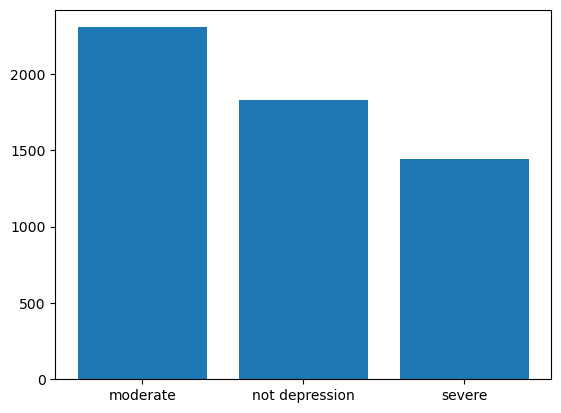

In [62]:
plt.bar(count.index,count.values)
plt.show()


In [50]:
k=review[review["Label"]=="severe"]
print(k)


               PID                                               data   Label
4136  dev_pid_4137  I Just Realized Why I do Poorly in School Mome...  severe
4137  dev_pid_4138  my libido is extremely low and id like to fix ...  severe
4138  dev_pid_4139  How can I [F30] stop taking paroxetine gradual...  severe
4139  dev_pid_4140  I just took 5 more prozac pills than i should’...  severe
4140  dev_pid_4141  Dreams/nightmares. : Hello I am taking propano...  severe
...            ...                                                ...     ...
4851           NaN  ["Aren ’ t we all just tired? : I ’ ve been fr...  severe
4852           NaN  ["NEED HELP COPING: I had my life pretty much ...  severe
4853           NaN  ["Qutting Zoloft Cold Turkey: I wasthe Aalborg...  severe
4854           NaN  ['Crying: I ’ m coming off my prescribing_anti...  severe
4855           NaN  ["Seeking for advice on how to overcome and de...  severe

[720 rows x 3 columns]


In [7]:
!pip install nlpaug

In [51]:
import nlpaug.augmenter.word as naw

In [8]:
import gensim.downloader as api

In [9]:
wv = api.load('word2vec-google-news-300')

In [52]:
import nlpaug.augmenter.word as naw
import gensim.downloader as api

# Download the pre-trained Word2Vec embeddings
#wv = api.load('word2vec-google-news-300')

# Path to save the downloaded embeddings file
word2vec_embeddings_path = "word2vec-google-news-300.bin"

# Save the downloaded embeddings to a file
#wv.save_word2vec_format(word2vec_embeddings_path, binary=True)

# Create an instance of WordEmbsAug augmenter with Word2Vec model
augmenter = naw.WordEmbsAug(model_type='word2vec', model_path=word2vec_embeddings_path)


In [53]:
# Lists to store augmented data and labels
l = []
m = []
for i in k["data"]:
    # Augment the text data using Word2Vec embeddings
    augmented_text = augmenter.augment(i)
    l.append(augmented_text)
    m.append("severe")

In [54]:
print(l[0])

['I Just Realized Why I do Poorly in School Moments ago: I ’ m currently a Sophomore in high school and have generally always had bare minimum / poor grades. For years my parents wrote it off as laziness because I seemed to do well on tests (usually A ’ s without studying ). On year myself was diagnosed with ADHD, which would explain past prob_lems with school so I started taking meds. This school year is the first I have taken my meds and p.m still barely scraping by in college prep classes, but tonight I had an epiphany baptism_invitations to my problem. I have always had a caring and supportive group of friends that have always been in honors classes, they all were nice, except for fourteen. This kid (Let ’ s call him Joe) Has always been a consistent asshole by turning jokes against me, Ithought friends against me, and of course ridiculing me for being in lower classes. It is unfortunately unjustified since we hang out with the same people so I tryyy to be nice to him. .. as much a

In [55]:
# Assuming your DataFrame is named 'df', 'l' is a list of data, and 'm' is a list of labels
new_data = pd.DataFrame({'data': l, 'Label': m})  # Create DataFrame with multiple rows

# Append the new DataFrame to the existing one
df = pd.concat([review, new_data], ignore_index=True)

df.head()



,PID,data,Label
0,dev_pid_1,"I enjoyed today, and I still am! Tomorrows dep...",moderate
1,dev_pid_2,I sorta tried to kill myself : I had a total b...,moderate
2,dev_pid_3,Best suicide method? : I like it quick and eas...,moderate
3,dev_pid_4,a story : I remember the time I'd get on my 3D...,moderate
4,dev_pid_5,The world only cares about beautiful people : ...,moderate


In [38]:
c=df["Label"].value_counts()
print(c)

Label
moderate          2306
not depression    1830
severe             720
Name: count, dtype: int64


In [56]:
df.to_csv('Augdata.csv', index=False)  # Replace 'modified_data.csv' with your desired filename


In [57]:
k=pd.read_csv("Augdata.csv")
k.size

16728